In [293]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Loading the CSV data for an Overview

In [294]:
df1 = pd.read_csv('employee.csv')
df1.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


Checking the data type of different Categorical and Continuous Attributes of Data

In [295]:
(df1.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

Segment out the coloumns of Categorical Attributes for Analysis

In [296]:
coloumn_list = df1.select_dtypes(include=['object']).columns
coloumn_list

Index(['Department', 'Job Role', 'Gender', 'Marital Status', 'Education',
       'Education Field', 'Business Travel', 'Job Involvement',
       'Job Satisfaction', 'Over Time', 'Environment Satisfaction',
       'Work Life Balance', 'Relationship Satisfaction', 'Attrition (Yes/No)'],
      dtype='object')

Dropping unnecessary count and ID from the Data

In [297]:
df1.drop("Employee Count", axis=1, inplace=True)
df1.drop("Employee ID", axis=1, inplace=True)
df1.head()

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,No
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,No
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,No


df2 is a datatype for numerical encoding of categorical attributes of the data

In [298]:
df2 = pd.DataFrame()
coloumn_list = df1.select_dtypes(include=['object']).columns
le = preprocessing.LabelEncoder()
for item in coloumn_list:
  le.fit(df1[item])
  df2[item]=le.transform(df1[item])
df2.head(5)

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,2,7,0,2,2,1,2,0,3,1,2,0,1,1
1,1,6,1,1,1,1,1,2,2,0,0,2,3,0
2,1,2,1,2,2,4,2,2,0,1,1,0,2,1
3,1,6,0,1,4,1,1,0,0,1,3,2,0,0
4,1,2,1,1,1,3,2,0,2,0,1,2,3,0


count_matrix() function calculates the chi squared contigency matrix and calculates NULL hypothesis value with 0.05 margin value

In [299]:
def count_matrix(df):
  sum = 0
  # coloumn_list = df.select_dtypes(include=['object']).columns
  p_values = {"Others":0}
  for coloumn in list(df.columns):
    # size = len(list(df1[coloumn].value_counts()))
    s = confusion_matrix(df["Attrition (Yes/No)"], df[coloumn])
    k = scipy.stats.chi2_contingency(s[:2, :], correction=True)
    p = round(k[1], 6)
    sum += k[1]
    if p<0.05:
      p_values["Others"] += p
    else:
      p_values[coloumn]=round(k[1], 6)
  return p_values, sum

Observation found by p-values of contigency matrix are:
1. Gender and Education attributes pass the NULL hypotheseis test hence are dropped from the feature table.

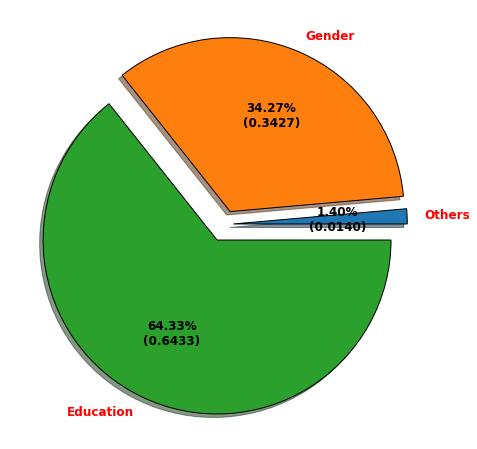

In [300]:
def func(pct, allvalues):
    absolute = pct / 100.*np.sum(allvalues)
    return f"{pct:.2f}%\n({absolute:.4f})"
explode = (0.05,  0.08, 0.1)
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
p_values, sum = count_matrix(df2)
keys = list(p_values.keys())
values = list(p_values.values())
values = [p/sum for p in values]
plt.figure(figsize=(15, 8));
wedges, texts, autotexts= plt.pie(values, autopct=lambda pct: func(pct, values), labels=keys, shadow=True ,wedgeprops=wp, explode=explode);
plt.setp(autotexts, size = 12, weight ="bold")
plt.setp(texts, size = 12, weight ="bold", color='r')
plt.plot();

Segment out the integer type Attributes for Analysis

In [301]:
coloumn_list = df1.select_dtypes(include=['int64']).columns
coloumn_list

Index(['Age', 'Distance From Home (kms)', 'Job Level', 'Monthly Income (USD)',
       'Salary Hike (%)', 'Stock Option Level', 'No. of Companies Worked',
       'Total Working Years', 'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'Training Times Last Year'],
      dtype='object')

Numerical attribute only dataframe 

In [302]:
df3 = pd.DataFrame()
coloumn_list = df1.select_dtypes(include=['int64']).columns
le = preprocessing.LabelEncoder()
for item in coloumn_list:
  le.fit(df1[item])
  df3[item]=le.transform(df1[item])
df3["labels"] = df2["Attrition (Yes/No)"]
df3.head()

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year,labels
0,23,0,1,809,1,0,2,8,6,4,0,5,0,1
1,31,7,1,682,13,1,1,10,10,7,1,7,3,0
2,19,1,0,62,5,0,6,7,0,0,0,0,3,1
3,15,2,0,313,1,0,1,8,8,7,3,0,3,0
4,9,1,0,399,2,1,9,6,2,2,2,2,3,0


Observations found when calculating Correlation between the Numerical Attributes:
1. Job Level and Monthly Income is highly correlated therefore Job Level attribute can be dropped.
2. Years with current Manager and Years In Current Role are highly correlated with Years with Company there the former two attributes are dropped.

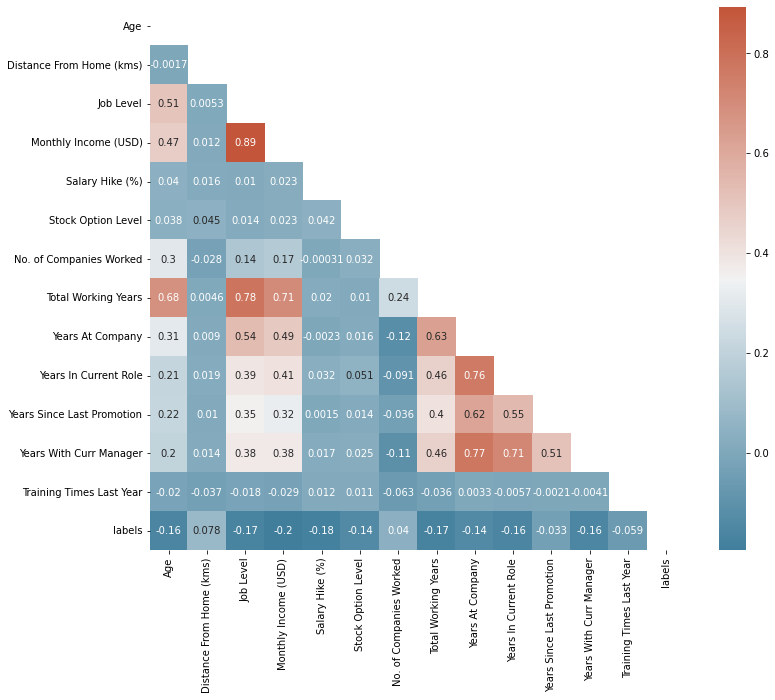

In [303]:
corr = df3.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap);

Calculating Dicatomy based pearson r values for labels and numnerical values observation found are:
1. The Job Level and Total working years have similar negative r value hence validating the dropping of Job level attribute.

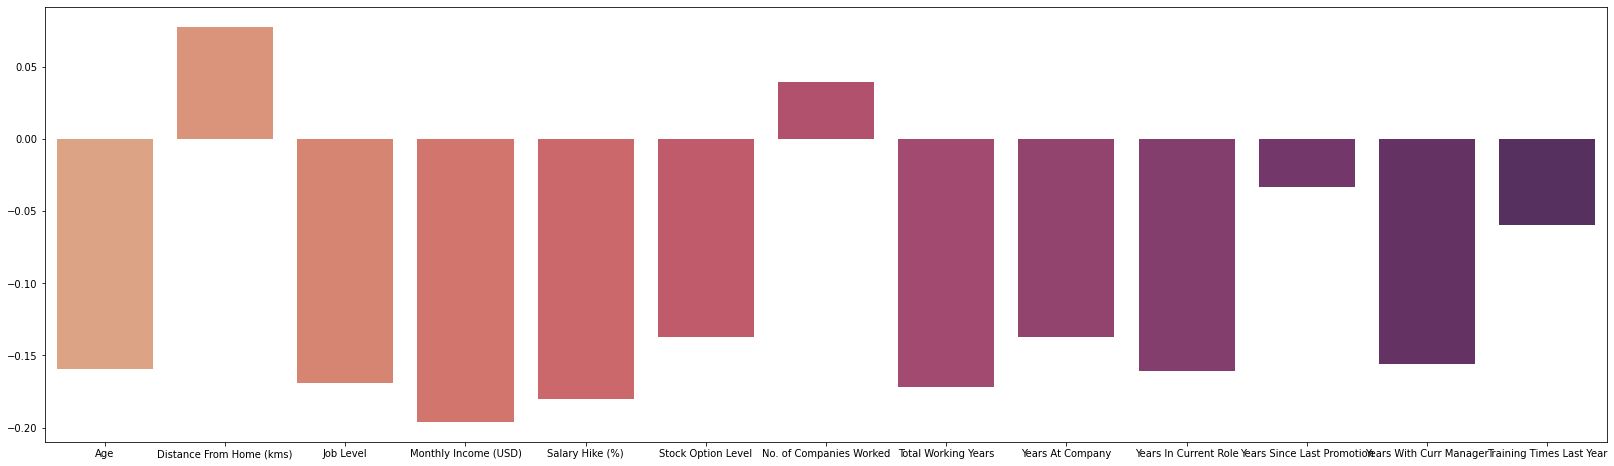

In [304]:
import numpy as np
pearson = dict()
for coloumn in coloumn_list:
  k = scipy.stats.pearsonr(df3[coloumn].astype(float), df2["Attrition (Yes/No)"].astype(float))
  pearson[coloumn]=k[0]
plt.figure(figsize=(28, 8));
sns.barplot(x=list(pearson.keys()), y=list(pearson.values()), palette="flare");

List of the attributes to be dropped after analysis

In [305]:
coloumns_to_drop = ["Job Level", "Gender", "Education", "Years With Curr Manager", "Years In Current Role", "Training Times Last Year", "Attrition (Yes/No)"]

One-Hot encoding of the categorical coloumns using pd.get_dummies()

In [306]:
df = pd.read_csv('employee.csv') # load csv data
k = df["Attrition (Yes/No)"] # 
le = preprocessing.LabelEncoder() # convert it to labels
le.fit(k)
k=le.transform(k)
columns_to_drop = ["Employee Count", "Employee ID", "Job Level", "Gender", "Education", "Years With Curr Manager", "Years In Current Role", "Training Times Last Year", "Attrition (Yes/No)"]
df = df.drop(columns=columns_to_drop)
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    tempdf = pd.get_dummies(df[column], prefix=column)
    df = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df = df.drop(columns=column)
# df = df.drop("Attrition (Yes/No)", axis=1)
df["labels"] = k
df.head()

,Age,Distance From Home (kms),Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years Since Last Promotion,Department_Human Resources,...,Environment Satisfaction_Very High,Work Life Balance_Bad,Work Life Balance_Best,Work Life Balance_Better,Work Life Balance_Good,Relationship Satisfaction_High,Relationship Satisfaction_Low,Relationship Satisfaction_Medium,Relationship Satisfaction_Very High,labels
0,41,1,5993,11,0,2,8,6,0,0,...,0,1,0,0,0,0,1,0,0,1
1,49,8,5130,23,1,1,10,10,1,0,...,0,0,0,1,0,0,0,0,1,0
2,37,2,2090,15,0,6,7,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,33,3,2909,11,0,1,8,8,3,0,...,1,0,0,1,0,1,0,0,0,0
4,27,2,3468,12,1,9,6,2,2,0,...,0,0,0,1,0,0,0,0,1,0


Finally trying out different Classifiers to predict on test set

In [307]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
result = dict()
# Create feature and target arrays
X = df.drop("labels", axis=1)
y = df["labels"]
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.15)
print(len(X_train), len(X_test))

1249 221


##KNN

In [308]:
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=2)) 
# Split into training and test set

pipe.fit(X_train, y_train)
knn = pipe.score(X_test, y_test)
print(f"KNN Accuracy: {knn}")
result["KNN"] = knn

KNN Accuracy: 0.8868778280542986


##Logistic Regression

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100)) 
pipe.fit(X_train, y_train)
lr = pipe.score(X_test, y_test)
print(f"Logistic Regression Accuracy: {lr}")
result["Logistic Regression"] = lr

Logistic Regression Accuracy: 0.9230769230769231


##Decision Tree

In [310]:
from sklearn.tree import DecisionTreeClassifier
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier()) 
pipe.fit(X_train, y_train)
dt = pipe.score(X_test, y_test)
print(f"Decision Tree Accuracy: {dt}")
result["Decision Tree"] = dt

Decision Tree Accuracy: 0.8416289592760181


##Support Vector Machine

In [311]:
from sklearn.svm import SVC
pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf')) 
pipe.fit(X_train, y_train)
svm = pipe.score(X_test, y_test)
print(f"SVM Accuracy: {svm}")
result["SVM"] = svm

SVM Accuracy: 0.9366515837104072


The graph below shows that SVM has much better accuracy than the others

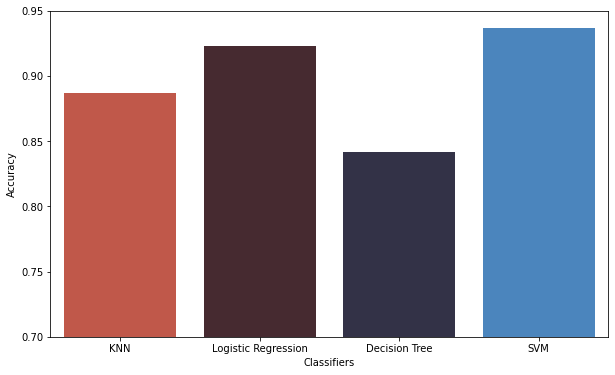

In [312]:
plt.figure(figsize=(10, 6));
plt.ylim(0.7, 0.95)
plt.ylabel("Accuracy")
plt.xlabel("Classifiers")
sns.barplot(x=list(result.keys()), y=list(result.values()), palette="icefire_r");